In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# getting data

base_path = '../input/spaceship-titanic'
df_train = pd.read_csv(os.path.join(base_path,'train.csv'), index_col='PassengerId')
df_test  = pd.read_csv(os.path.join(base_path,'test.csv'), index_col='PassengerId')

In [3]:
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [4]:
df_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [5]:
print(f'train length: {df_train.shape}')
print(f'test length: {df_test.shape}')

train length: (8693, 13)
test length: (4277, 12)


In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df_train.columns.tolist()

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [8]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [9]:
df_test.columns.tolist()

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [10]:
# printing NaN data count
print(df_train.isna().sum())
print()
print(df_test.isna().sum())

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [11]:
# another imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats

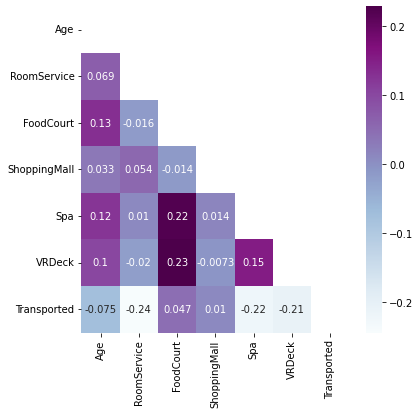

In [12]:
# seeing correlation between the attributes
corr_ = df_train.corr()
matrix = np.triu(corr_)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(corr_, annot=True, ax=ax, cmap='BuPu', mask=matrix)
plt.show()

### Selecting columns

In [13]:
columns = ['HomePlanet', 'Destination', 'Age', 'VIP', 'RoomService', 'Transported']

data = df_train[columns]

data.head()

,HomePlanet,Destination,Age,VIP,RoomService,Transported
PassengerId,,,,,,
0001_01,Europa,TRAPPIST-1e,39.0,False,0.0,False
0002_01,Earth,TRAPPIST-1e,24.0,False,109.0,True
0003_01,Europa,TRAPPIST-1e,58.0,True,43.0,False
0003_02,Europa,TRAPPIST-1e,33.0,False,0.0,False
0004_01,Earth,TRAPPIST-1e,16.0,False,303.0,True


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   Destination  8511 non-null   object 
 2   Age          8514 non-null   float64
 3   VIP          8490 non-null   object 
 4   RoomService  8512 non-null   float64
 5   Transported  8693 non-null   bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 416.0+ KB


In [15]:
print(data.isna().sum())

HomePlanet     201
Destination    182
Age            179
VIP            203
RoomService    181
Transported      0
dtype: int64


In [16]:
# seeing unique values in each column
for col in columns:
    print(f'{col}: {len(data[col].unique())} unique values')

HomePlanet: 4 unique values
Destination: 4 unique values
Age: 81 unique values
VIP: 3 unique values
RoomService: 1274 unique values
Transported: 2 unique values


In [17]:
def grouping_categories(df, col, labels, division=3):
    min_value = df[col].min()
    max_value = df[col].max()
    step = np.round(max_value/division)
    intervals = np.arange( np.round(max_value), min_value, (-step), dtype=int)
    
    for i in range(len(labels)):
        df.loc[(df[col] < intervals[i]), f'{col}_Group'] = labels[i]

In [18]:
# grouping ages and room services
grouped_data = data.copy()

grouped_data.head()
ages = ['Old', 'Adult', 'Young']
rooms = ['I', 'II', 'III', 'IV']
grouping_categories(grouped_data, 'Age', ages)
grouping_categories(grouped_data, 'RoomService', rooms, division=4)
grouped_data.head()

,HomePlanet,Destination,Age,VIP,RoomService,Transported,Age_Group,RoomService_Group
PassengerId,,,,,,,,
0001_01,Europa,TRAPPIST-1e,39.0,False,0.0,False,Adult,IV
0002_01,Earth,TRAPPIST-1e,24.0,False,109.0,True,Young,IV
0003_01,Europa,TRAPPIST-1e,58.0,True,43.0,False,Old,IV
0003_02,Europa,TRAPPIST-1e,33.0,False,0.0,False,Adult,IV
0004_01,Earth,TRAPPIST-1e,16.0,False,303.0,True,Young,IV


### Which age interval was more transported?

In [19]:
columns = ['Age_Group', 'Transported']
df_pivot = grouped_data[columns]
df_pivot = pd.DataFrame(df_pivot.value_counts(normalize=True), columns=['Percent'])
df_pivot

Percent
Age_Group Transported          
Young     True         0.255904
          False        0.233345
Adult     False        0.225825
          True         0.211726
Old       False        0.037011
          True         0.036188

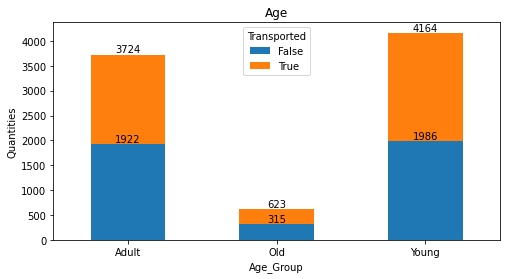

In [20]:
df_pivot = grouped_data[columns]
df_pivot = df_pivot.groupby(columns).size().unstack()

ax = df_pivot.plot(kind='bar', stacked=True, title='Age', rot=0, figsize=(8, 4))
for container in ax.containers:
    ax.bar_label(container)

plt.ylabel('Quantities')
plt.show()

Young people: person that is less than 26 years old!

#### Which age exactly?

In [21]:
columns = ['Age', 'Transported']
df_pivot = grouped_data[columns]

age_transp = df_pivot.groupby('Transported').agg(['min', 'mean', 'max'])
age_transp

Age                 
             min       mean   max
Transported                      
False        0.0  29.922858  79.0
True         0.0  27.748834  78.0

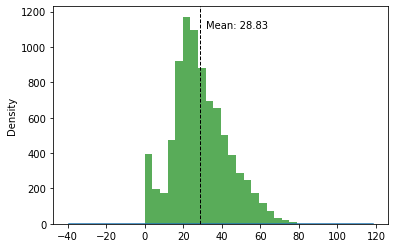

In [22]:
df_pivot['Age'].plot(kind='hist', bins=20, alpha=0.65, color='g')
df_pivot['Age'].plot(kind='kde')
plt.axvline(df_pivot['Age'].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df_pivot['Age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df_pivot['Age'].mean()))
plt.show()

In [23]:
youngest = pd.DataFrame(df_pivot.loc[df_pivot['Age'] < 26], columns=columns)
grouping_categories(youngest, 'Age', ['0-5', '6-12', '13-17', '18-22', '23-25'], division=5)

youngest

,Age,Transported,Age_Group
PassengerId,,,
0002_01,24.0,True,0-5
0004_01,16.0,True,6-12
0008_01,14.0,True,13-17
0015_01,24.0,False,0-5
0017_01,0.0,True,23-25
...,...,...,...
9267_02,20.0,True,0-5
9272_02,21.0,False,0-5
9274_01,23.0,True,0-5


In [24]:
youngest.drop(columns=['Age'], inplace=True)
pd.DataFrame(youngest.value_counts(normalize=True), columns=['Percent %'])

Percent %
Transported Age_Group           
False       0-5         0.228032
True        0-5         0.181221
            6-12        0.152751
False       6-12        0.140980
True        23-25       0.098002
            13-17       0.062962
False       13-17       0.048180
True        18-22       0.034218
False       23-25       0.029565
            18-22       0.024090

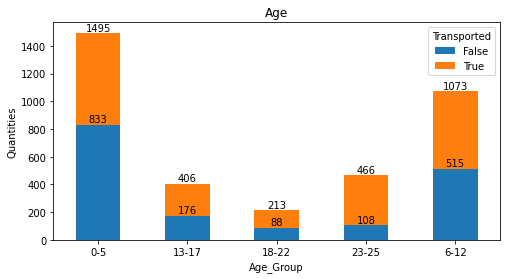

In [25]:
columns = ['Age_Group', 'Transported']
df_pivot = youngest[columns]
df_pivot = df_pivot.groupby(columns).size().unstack()

ax = df_pivot.plot(kind='bar', stacked=True, title='Age', rot=0, figsize=(8, 4))
for container in ax.containers:
    ax.bar_label(container)

plt.ylabel('Quantities')
plt.show()

0 to 5 years is the most part of the yougest people on the ship!

### What about the rooms?

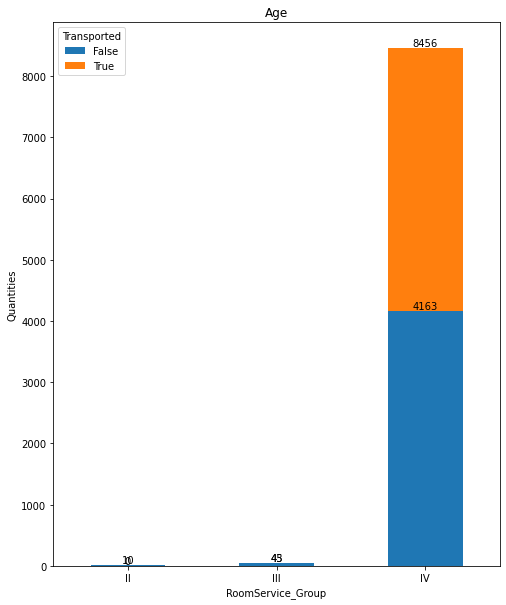

In [26]:
columns = ['RoomService_Group', 'Transported']
df_pivot = grouped_data[columns]

df_pivot = grouped_data[columns]
df_pivot = df_pivot.groupby(columns).size().unstack()

ax = df_pivot.plot(kind='bar', stacked=True, title='Age', rot=0, figsize=(8, 10))
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Quantities')
plt.show()

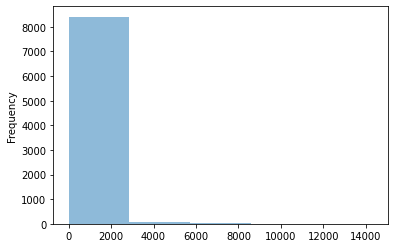

In [27]:
ax = grouped_data['RoomService'].plot.hist(bins=5, alpha=0.5)

plt.show()

### Does exist some relation between the transported people and the VIP's one?

In [28]:
columns = ['VIP', 'Transported']
df_pivot = grouped_data[columns]
pd.DataFrame(df_pivot.value_counts(normalize=True), columns=['Percent %'])

Percent %
VIP   Transported           
False True          0.494464
      False         0.482097
True  False         0.014488
      True          0.008952

Passegers who were NOT VIP were carried more!

### What about the destination and source places?

In [29]:
columns = ['Destination', 'Transported']
df_pivot = grouped_data[columns]
pd.DataFrame(df_pivot.value_counts(normalize=True), columns=['Percent %'])

Percent %
Destination   Transported           
TRAPPIST-1e   False         0.367524
              True          0.327459
55 Cancri e   True          0.129010
              False         0.082481
PSO J318.5-22 True          0.047115
              False         0.046411

Passegers with 'TRAPPIST-1e' as destination place were transported less!

In [30]:
columns = ['HomePlanet', 'Transported']
df_pivot = grouped_data[columns]
home_ = pd.DataFrame(df_pivot.value_counts(normalize=True), columns=['Percent %'])
home_

Percent %
HomePlanet Transported           
Earth      False         0.312176
           True          0.229746
Europa     True          0.165332
Mars       True          0.108337
           False         0.098799
Europa     False         0.085610

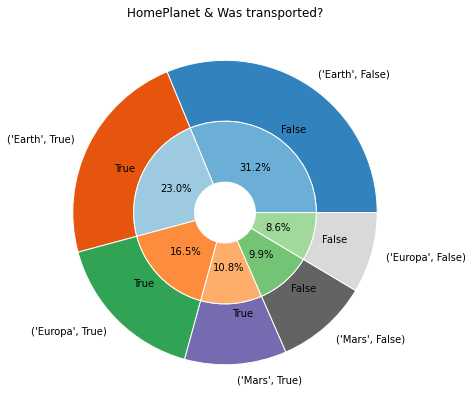

In [31]:
att_count = home_.groupby('HomePlanet').sum()
att_labels = home_.index.tolist()
transported = home_.reset_index()['Percent %']
labels = home_.reset_index()['Transported']

size=0.4

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17, 18, 20 ]))
fig, ax = plt.subplots(figsize =(10, 7))

ax.pie(home_['Percent %'], radius=1, labels=att_labels, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),
       # autopct='%1.1f%%'
       )

ax.pie(transported, radius=1-size, colors=inner_colors, 
       labels=labels,
       wedgeprops=dict(width=size, edgecolor='w'), 
       autopct='%1.1f%%'
       )

ax.set(aspect="equal", title='HomePlanet & Was transported?')

plt.show()

More passegers from Earth were transported by the ship than from other planets!